# Overview Exercises

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?
- Is the website redesign any good?
- Is our television ad driving more sales?

***Has the network latency gone up since we switched internet service providers?***

Revised question:

- Has network latency changed since switching internet service providers?

H0:

- Network latency has not changed same or decreased since switching

Ha:

- Network latency has changed since switching internet service providers

True positive: Said there was a difference and there was

- Our test confirmed that the change after switching was indeed not due to chance

True negative: Failed to reject the null hypothesis when it was indeed false

- Our test confirmed that the change was indeed due to chance 

Type I Error (False Positive Rate): Said there was a difference where there wasn't

- Our test disproved the null hypothesis of no change but the change was actually due to chance and the null should not have been rejected

Type II Error (False Negative): Failing to reject null hypothesis when it is false

- Our test failed to reject the null hypothesis of no change when we should have rejected it


***Is the website redesign any good?***

Revised question:

- Have click through rates changed since redesigning the website?

H0:

- Click through rates have not changed since redesigning the website

Ha:

- Click through rates have changed since redesigning the website

True positive: Said there was a difference and there was

- Our test confirmed that the change after redesign was indeed not due to chance

True negative: Rejected the null hypothesis when it was indeed false

- Our test confirmed that the change was indeed due to chance 

Type I Error (False Positive Rate): Said there was a difference where there wasn't

- Our test disproved the null hypothesis of no change but the change was actually due to chance and the null should not have been rejected

Type II Error (False Negative): Failing to reject null hypothesis when it is false

- Our test failed to reject the null hypothesis of no change when we should have rejected it


***Is our television ad driving more sales?***

Revised question:

- Has sales revenue changed since we deployed our TV ad?

H0:

- Sales revenue has not changed since deploying TV ad

Ha:

- Sales revenue has changed since deploying TV ad

True positive: Said there was a difference and there was

- Our test confirmed that the change after switching was indeed not due to chance

True negative: Rejected the null hypothesis when it was indeed false

- Our test confirmed that the change was indeed due to chance 

Type I Error (False Positive Rate): Said there was a difference where there wasn't

- Our test disproved the null hypothesis of no change but the change was actually due to chance and the null should not have been rejected

Type II Error (False Negative): Failing to reject null hypothesis when it is false

- Our test failed to reject the null hypothesis of no change when we should have rejected it since there was a statistically significant difference

# T-Test Exercises 

In [31]:
# imports

from math import sqrt
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import viz # curriculum visualization examples

import seaborn as sns
from pydataset import data

### 1.

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

Formula to manually calculate t-statistic for this case:

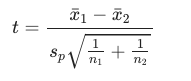

Formula to calculate pooled standard deviation to use in formula above:

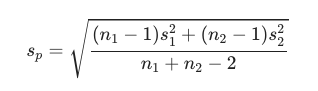

Will need to use 2 sample t test.

H0: There is no difference in average time it takes to sell homes in two different offices

Ha: There is a difference in average time it takes to sell homes in two different offices

In [12]:
#create and assign variables for all needed parts of above formula
xbar1 = 90
s1 = 15
n1 = 40

xbar2 = 100
s2 = 20
n2 = 50

degf = n1 + n2 - 2

In [13]:
# calculate pooled standard deviation

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
s_p

17.956702977389302

In [14]:
# calculate test statistic

t = (xbar1 - xbar2) / (s_p * sqrt(1/n1 + 1/n2))
t

-2.6252287036468456

In [17]:
# calculate p value

p = stats.t(degf).cdf(t) * 2
p

0.01020985244923939

***Because p < 0.05, we can reject the null hypothesis and can say that the difference in average time that it takes to sell homes in the two different offices is statistically significant***

### 2.

Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [39]:
# load the mpg dataset
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


#### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [35]:
mpg.groupby('year').cyl.count()

year
1999    117
2008    117
Name: cyl, dtype: int64

##### **Hypotheses:**

H0: there is no difference in average fuel efficiency in cars made in 2008 vs those made in 1999

Ha: there is a difference in average fuel efficiency in cars made in 2008 vs those made in 1999

Two sample t-test is needed. Two tailed.


In [41]:
# add a column for average fuel efficiency that is the average of city and hwy mpg
mpg['avg_mpg'] = (mpg.cty + mpg.hwy) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [44]:
# create pandas series for each group using boolean masks
Oeight = mpg[mpg.year == 2008].avg_mpg
Oeight.head()

3     25.5
4     25.5
7     22.5
10    24.0
11    23.0
Name: avg_mpg, dtype: float64

In [48]:
ninety_nine = mpg[mpg.year == 1999].avg_mpg
ninety_nine.head()

1    23.5
2    25.0
5    21.0
6    22.0
8    22.0
Name: avg_mpg, dtype: float64

##### **Test assumptions:**

<AxesSubplot:>

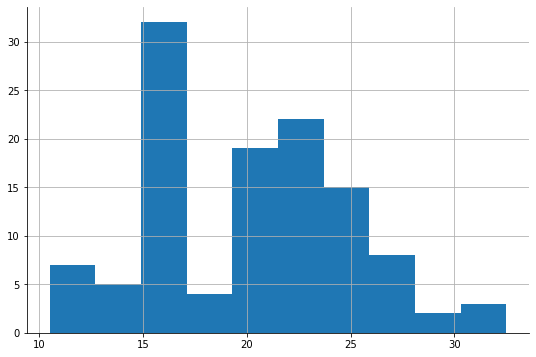

In [49]:
# plot distributions to see if normal

Oeight.hist()

In [51]:
Oeight.size

117

<AxesSubplot:>

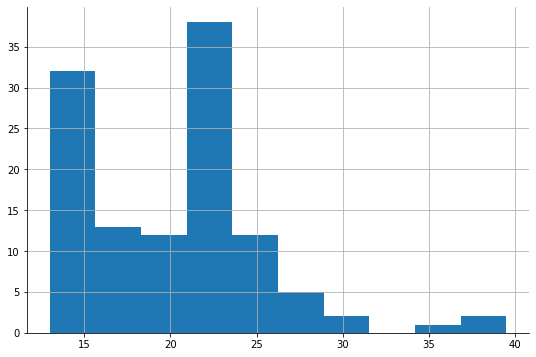

In [53]:
ninety_nine.hist()

In [52]:
# normal enough due to large number of observations

In [54]:
# check variances
Oeight.var()

24.097480106100797

In [55]:
ninety_nine.var()

27.122605363984682

In [56]:
# close enough

##### Compute Test Statistic and p value:

In [58]:
# compute test statistic

t, p = stats.ttest_ind(Oeight, ninety_nine, equal_var = True) # not necessary to include equal_var argument 
# here since same as default, but adding to remember argument exists
t, p

(-0.21960177245940962, 0.8263744040323578)

In [120]:
t, p = stats.ttest_ind(Oeight, ninety_nine, equal_var = False) # checking to copare difference
t, p

(-0.21960177245940962, 0.8263750772060638)

In [59]:
Oeight.mean()

20.076923076923077

In [60]:
ninety_nine.mean()

20.22222222222222

##### Conclusion: 

***We fail to reject the null hypothesis and conclude that there is not a statistically significant difference between the means of the two groups***

In [61]:
# double check answer with Mann-Whitney's test

In [62]:
stats.mannwhitneyu(Oeight, ninety_nine)

MannwhitneyuResult(statistic=6678.5, pvalue=0.3744934268007572)

In [63]:
# p value for non-parametric test is also above 0.05

#### Are compact cars more fuel-efficient than the average car?

In [64]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [65]:
mpg.groupby('class').cyl.count()

class
2seater        5
compact       47
midsize       41
minivan       11
pickup        33
subcompact    35
suv           62
Name: cyl, dtype: int64

##### Hypotheses:

This will be one sample t test and single tailed

H0: Average mpg of compact cars is less than or equal to that of all other cars

Ha: Average mpg of compact cars is greater than that of all other cars

In [71]:
# create pandas series for each group using boolean masks

compact = mpg[mpg['class'] == 'compact'].avg_mpg
compact.head()

1    23.5
2    25.0
3    25.5
4    25.5
5    21.0
Name: avg_mpg, dtype: float64

In [73]:
all_cars = mpg.avg_mpg
all_cars.head()

1    23.5
2    25.0
3    25.5
4    25.5
5    21.0
Name: avg_mpg, dtype: float64

In [75]:
# look at averages to get an idea before running test

compact.mean()

24.21276595744681

In [76]:
all_cars.mean()

20.14957264957265

##### Test assumptions:

<AxesSubplot:>

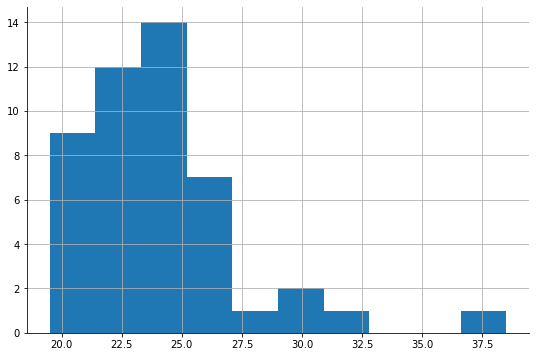

In [77]:
compact.hist()

In [78]:
compact.size

47

In [79]:
# close enough to normal and has more than 30 observations

<AxesSubplot:>

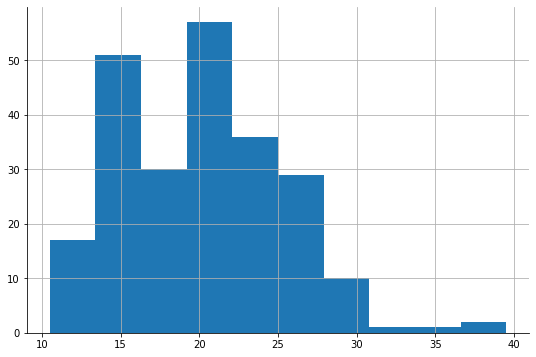

In [80]:
all_cars.hist()

In [81]:
all_cars.size

234

In [82]:
# close enough to normal and has more than 30 observations

##### Compute Test Statistic and p value:

In [85]:
t, p = stats.ttest_1samp(compact, all_cars.mean())
t, p/2

(7.896888573132535, 2.0992818971585668e-10)

In [90]:
#help(stats.ttest_1samp)

##### Conclusion: 

***We reject the null hypothesis and have evidence to support that there is a statistically significant different in average fuel efficiency between compact cars and all other cars and that they have better average fuel efficiency.***

In [87]:
# investigate necessary args for Wilcoxon signed rank test
#help(stats.wilcoxon)

In [92]:
# run non-parametric test and compare results

#stats.wilcoxon(compact, all_cars)

# this didn't work for this problem, arrays passed in must be of same length and it doesn't accept a
# pop mean like the stats.ttest_1samp() does, would need to look more into how to set things up to 
# run this test

#### Do manual cars get better gas mileage than automatic cars?

##### Hypotheses:

Two sample t test with single tail

H0: Gas mileage of manual cars is less than or equal to that of automatic cars

Ha: Manual cars get better gas mileage than automatic cars

In [93]:
# create series for each group using boolean masks
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [95]:
# create new column for is_auto
mpg['is_auto'] = mpg.trans.str.contains("auto")
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg,is_auto
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,True


In [100]:
auto = mpg[mpg.is_auto == True].avg_mpg
auto.head()

1    23.5
4    25.5
5    21.0
7    22.5
9    20.5
Name: avg_mpg, dtype: float64

In [102]:
manual = mpg[mpg.is_auto == False].avg_mpg
manual.head()

2     25.0
3     25.5
6     22.0
8     22.0
10    24.0
Name: avg_mpg, dtype: float64

##### Test Assumptions:

- Independent? Yes
- Normally distributed or sufficient observations? Yes (see histograms and observation counts below)
- Equal variances? See variance calculations below
    - Not sure on this one, will run with both arguments and do non parametric

<AxesSubplot:>

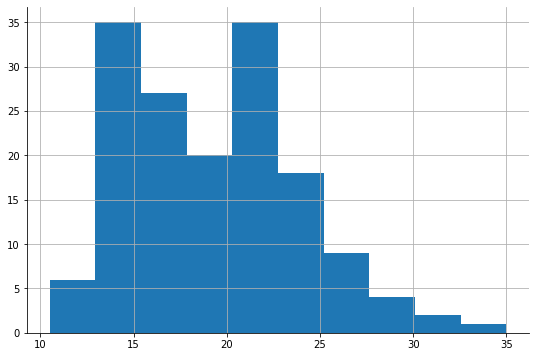

In [104]:
auto.hist()

In [105]:
auto.size

157

<AxesSubplot:>

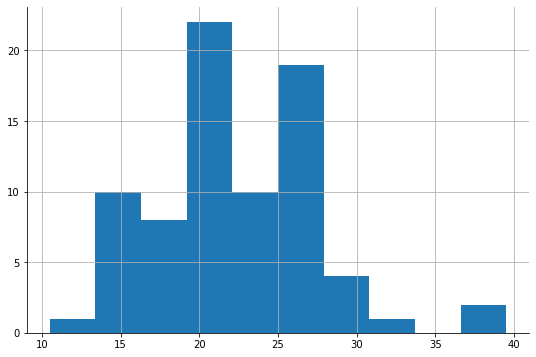

In [106]:
manual.hist()

In [107]:
manual.size

77

In [108]:
auto.var()

21.942777233382337

In [109]:
manual.var()

26.635167464114826

##### Compute test statistic and p value:

In [112]:
t, p = stats.ttest_ind(manual, auto, equal_var = True)
t, p/2

(4.593437735750014, 3.5771872005728416e-06)

In [113]:
t, p = stats.ttest_ind(manual, auto, equal_var = False)
t, p/2

(4.443514012903071, 8.976124499958965e-06)

In [114]:
stats.mannwhitneyu(manual, auto)

MannwhitneyuResult(statistic=3895.5, pvalue=4.9297998930308745e-06)

In [115]:
manual.mean()

22.227272727272727

In [116]:
auto.mean()

19.130573248407643

##### Conclusion:

***We reject the null hypothesis and have evidence that there is a statistically significant difference in mean fuel efficiency between manual and automatic cars and that manual cars have better fuel efficiency on average***